<font color='#d90fa0'><b>ASESOR DE MODA - PREDICCIÓN DE FALDAS</b></font>

Para el análisis del asesor de moda se generará el archivo resultante de la predicción la prenda tipo FALDA por tipo de cuerpo en ésta sección.

Agregar librerías

In [232]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Lectura y revisión de archivo de datos

In [233]:
#Leer archivo
datoscsv = pd.read_csv("C:\\Users\\Syslan\\Curso AI\\DemoDayAsesorModa\\dataset\\DSFaldas.csv",encoding='unicode_escape')
print(datoscsv.shape)

(85, 14)


In [234]:
#Reviso estructura de información
datoscsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SEXO          85 non-null     object
 1   IDSEXO        85 non-null     int64 
 2   TIPOCUERPO    85 non-null     object
 3   IDTIPOCUERPO  85 non-null     int64 
 4   TIPO          85 non-null     object
 5   IDTIPO        85 non-null     int64 
 6   MODELO        85 non-null     object
 7   IDMODELO      85 non-null     int64 
 8   ALTURA        85 non-null     object
 9   FORMA         85 non-null     object
 10  PLIEGUES      85 non-null     object
 11  VUELOS        85 non-null     object
 12  CAPAS         85 non-null     object
 13  PRENDAAPTA    85 non-null     int64 
dtypes: int64(5), object(9)
memory usage: 9.4+ KB


In [235]:
#Reviso datos de archivo desde cabecera
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPO,IDTIPO,MODELO,IDMODELO,ALTURA,FORMA,PLIEGUES,VUELOS,CAPAS,PRENDAAPTA
0,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,TABLEADA,1,LARGO,A,SI,NO,NO,0
1,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,LAPIZ,2,LARGO,RECTO,NO,NO,NO,0
2,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,ASIMÉTRICA,3,LARGO,A,NO,SI,NO,0
3,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,GODETS,4,MEDIO,RECTO,SI,NO,NO,0
4,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,SIRENA,5,LARGO,SIRENA,NO,SI,NO,0


<b>Análisis de datos</b>

In [236]:
#armo mi dataset temporal que me ayudará a cambiar los valores string por valores numéricos
FullDataSet = [datoscsv]

1. Reviso si existen datos nulos o vacíos

In [237]:
#reviso los campos en busca de valores Nulos (Nan)
campoConNulos = pd.concat([datoscsv.isnull().sum()], axis=1, keys=['DATASET']) 
print(campoConNulos[campoConNulos.sum(axis=1) > 0])

Empty DataFrame
Columns: [DATASET]
Index: []


**Nota:** No existen datos vacíos

2. Análisis sexo vs prendaapta

In [238]:
#analiza sexo vs prendaapta
datoscsv[['IDSEXO', 'PRENDAAPTA']].groupby(['IDSEXO'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,IDSEXO,PRENDAAPTA
0,1,0.352941


**Nota:** No existe mayor relación entre el sexo y el campo prendaapta

3. Análisis tipo de cuerpo vs prendaapta

In [239]:
#analiza tipo de cuerpo vs prendaapta
datoscsv[['IDTIPOCUERPO', 'PRENDAAPTA']].groupby(['IDTIPOCUERPO'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,IDTIPOCUERPO,PRENDAAPTA
0,1,0.411765
2,3,0.352941
3,4,0.352941
4,5,0.352941
1,2,0.294118


**Nota:** No existe mayor relación entre tipo de cuerpo y el campo prendaapta

4. Análisis de campo falda vs prendaapta

In [240]:
#analiza tipo de prenda vs prendaapta
datoscsv[['IDTIPO', 'PRENDAAPTA']].groupby(['IDTIPO'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,IDTIPO,PRENDAAPTA
0,1,0.352941


**Nota:** No existe mayor relación entre tipo de modelo y el campo prendaapta

5. Análisis de modelo de falda vs predaapta

In [241]:
#analiza tipo de prenda vs prendaapta
datoscsv[['IDMODELO', 'PRENDAAPTA']].groupby(['IDMODELO'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,IDMODELO,PRENDAAPTA
5,6,0.8
0,1,0.6
2,3,0.6
14,15,0.6
13,14,0.6
15,16,0.4
1,2,0.4
10,11,0.2
12,13,0.2
11,12,0.2


**Nota:** si existe relación entre el modelo de falda y el campo prendaapta

6. Análisis de altura vs prendaapta. El campo altura posee valores tipo string, por lo que deben transformarse en campo entero.

In [242]:
#cambio valores string por numéricos
for dataset in FullDataSet:
    dataset.loc[ dataset['ALTURA'] == 'CORTO', 'ALTURA'] = int(1)
    dataset.loc[ dataset['ALTURA'] == "MEDIO", 'ALTURA'] = int(2)
    dataset.loc[ dataset['ALTURA'] == "LARGO", 'ALTURA'] = int(3)

In [243]:
#reviso que dataset tenga nuevos valores
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPO,IDTIPO,MODELO,IDMODELO,ALTURA,FORMA,PLIEGUES,VUELOS,CAPAS,PRENDAAPTA
0,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,TABLEADA,1,3,A,SI,NO,NO,0
1,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,LAPIZ,2,3,RECTO,NO,NO,NO,0
2,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,ASIMÉTRICA,3,3,A,NO,SI,NO,0
3,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,GODETS,4,2,RECTO,SI,NO,NO,0
4,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,SIRENA,5,3,SIRENA,NO,SI,NO,0


In [244]:
#altura vs prendaapta
datoscsv[['ALTURA', 'PRENDAAPTA']].groupby(['ALTURA'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,ALTURA,PRENDAAPTA
2,3,0.400
1,2,0.375
0,1,0.200


**Nota:** La altura si tiene relación con el campo prendaapta

7. Análisis de relación de tipo de cuerpo, altura y prendaapta

In [245]:
#tipo de cuerpo, altura y prendaapta
datoscsv[['IDTIPOCUERPO','ALTURA','PRENDAAPTA']].groupby(['IDTIPOCUERPO','ALTURA'], as_index=False).mean().sort_values(by='IDTIPOCUERPO', ascending=False)

,IDTIPOCUERPO,ALTURA,PRENDAAPTA
12,5,1,0.000000
13,5,2,0.250000
14,5,3,0.666667
9,4,1,0.000000
10,4,2,0.375000
11,4,3,0.500000
6,3,1,0.000000
7,3,2,0.375000
8,3,3,0.500000
3,2,1,0.333333


**Nota:** El campo altura si tiene relación

C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


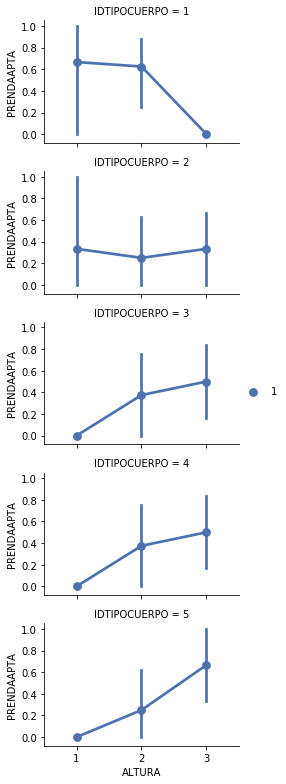

In [246]:
grid = sns.FacetGrid(datoscsv, row='IDTIPOCUERPO', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'ALTURA', 'PRENDAAPTA', 'IDTIPO', palette='deep')
grid.add_legend()

**Nota:** El tipo de cuerpo si tiene relación con la altura y el campo prendaapta

8. Análisis de forma vs prendaapta. El campo forma posee valores tipo string, por lo que deben transformarse en campo entero.

In [247]:
#cambio valores string por numéricos
for dataset in FullDataSet:
    dataset.loc[ dataset['FORMA'] == 'A', 'FORMA'] = int(1)
    dataset.loc[ dataset['FORMA'] == "CIRCULAR", 'FORMA'] = int(2)
    dataset.loc[ dataset['FORMA'] == "RECTO", 'FORMA'] = int(3)
    dataset.loc[ dataset['FORMA'] == "SIRENA", 'FORMA'] = int(3)

In [248]:
#reviso que dataset tenga nuevos valores
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPO,IDTIPO,MODELO,IDMODELO,ALTURA,FORMA,PLIEGUES,VUELOS,CAPAS,PRENDAAPTA
0,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,TABLEADA,1,3,1,SI,NO,NO,0
1,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,LAPIZ,2,3,3,NO,NO,NO,0
2,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,ASIMÉTRICA,3,3,1,NO,SI,NO,0
3,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,GODETS,4,2,3,SI,NO,NO,0
4,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,SIRENA,5,3,3,NO,SI,NO,0


In [249]:
#analiza forma vs prendaapta
datoscsv[['FORMA','PRENDAAPTA']].groupby(['FORMA'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,FORMA,PRENDAAPTA
0,1,0.542857
2,3,0.222222
1,2,0.200000


**Nota:** La forma de la prenda si tiene relación con el campo prendaapta.

In [250]:
#analiza tipo de cuerpo,forma,prendaapta
datoscsv[['IDTIPOCUERPO','FORMA','PRENDAAPTA']].groupby(['IDTIPOCUERPO','FORMA'], as_index=False).mean().sort_values(by='IDTIPOCUERPO', ascending=False)

,IDTIPOCUERPO,FORMA,PRENDAAPTA
12,5,1,0.428571
13,5,2,0.000000
14,5,3,0.333333
9,4,1,0.857143
10,4,2,0.000000
11,4,3,0.000000
6,3,1,0.857143
7,3,2,0.000000
8,3,3,0.000000
3,2,1,0.000000


C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


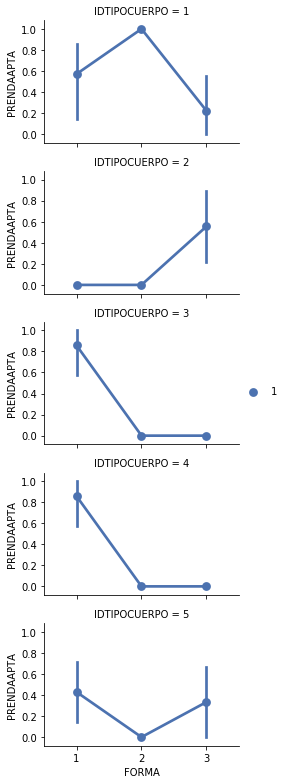

In [251]:
grid = sns.FacetGrid(datoscsv, row='IDTIPOCUERPO', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'FORMA', 'PRENDAAPTA', 'IDTIPO', palette='deep')
grid.add_legend()

**Nota:** El tipo de cuerpo si tiene relación con la forma de la prenda y el campo prendaapta.

9. Análisis de pliegues vs prendaapta. El campo pliegues posee valores tipo string, por lo que deben transformarse en campo entero.

In [252]:
#cambio valores string por numéricos
for dataset in FullDataSet:
    dataset.loc[ dataset['PLIEGUES'] == 'SI', 'PLIEGUES'] = 1
    dataset.loc[ dataset['PLIEGUES'] == "NO", 'PLIEGUES'] = 0

In [253]:
#reviso que dataset tenga nuevos valores
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPO,IDTIPO,MODELO,IDMODELO,ALTURA,FORMA,PLIEGUES,VUELOS,CAPAS,PRENDAAPTA
0,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,TABLEADA,1,3,1,1,NO,NO,0
1,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,LAPIZ,2,3,3,0,NO,NO,0
2,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,ASIMÉTRICA,3,3,1,0,SI,NO,0
3,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,GODETS,4,2,3,1,NO,NO,0
4,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,SIRENA,5,3,3,0,SI,NO,0


In [254]:
#analiza pliegues vs prendaapta
datoscsv[['PLIEGUES','PRENDAAPTA']].groupby(['PLIEGUES'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,PLIEGUES,PRENDAAPTA
0,0,0.420000
1,1,0.257143


**Nota:** Los pliegues de la prenda no tienen mayor peso relacionado directamente con el campo prendaapta

In [255]:
#analiza tipo de cuerpo,pliegues,prendaapta
datoscsv[['IDTIPOCUERPO','PLIEGUES','PRENDAAPTA']].groupby(['IDTIPOCUERPO','PLIEGUES'], as_index=False).mean().sort_values(by='IDTIPOCUERPO', ascending=False)

,IDTIPOCUERPO,PLIEGUES,PRENDAAPTA
8,5,0,0.400000
9,5,1,0.285714
6,4,0,0.500000
7,4,1,0.142857
4,3,0,0.500000
5,3,1,0.142857
2,2,0,0.300000
3,2,1,0.285714
0,1,0,0.400000
1,1,1,0.428571


C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


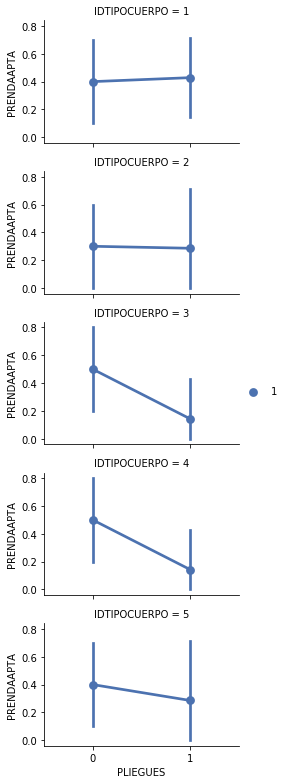

In [256]:
grid = sns.FacetGrid(datoscsv, row='IDTIPOCUERPO', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'PLIEGUES', 'PRENDAAPTA', 'IDTIPO', palette='deep')
grid.add_legend()

**Nota:** El tipo de cuerpo si tiene relación con los pliegues de la prenda y el campo prendaapta.

10. Análisis de vuelos vs prendaapta. El campo vuelos posee valores tipo string, por lo que deben transformarse en campo entero.

In [257]:
#cambio valores string por numéricos
for dataset in FullDataSet:
    dataset.loc[ dataset['VUELOS'] == 'SI', 'VUELOS'] = 1
    dataset.loc[ dataset['VUELOS'] == "NO", 'VUELOS'] = 0

In [258]:
#reviso que dataset tenga nuevos valores
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPO,IDTIPO,MODELO,IDMODELO,ALTURA,FORMA,PLIEGUES,VUELOS,CAPAS,PRENDAAPTA
0,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,TABLEADA,1,3,1,1,0,NO,0
1,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,LAPIZ,2,3,3,0,0,NO,0
2,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,ASIMÉTRICA,3,3,1,0,1,NO,0
3,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,GODETS,4,2,3,1,0,NO,0
4,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,SIRENA,5,3,3,0,1,NO,0


In [259]:
#analiza vuelos vs prendaapta
datoscsv[['VUELOS','PRENDAAPTA']].groupby(['VUELOS'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,VUELOS,PRENDAAPTA
1,1,0.440000
0,0,0.316667


**Nota:** Los vuelos de la prenda no tienen mayor peso relacionado directamente con el campo prendaapta

In [260]:
#tipo de cuerpo,vuelos,prendaapta
datoscsv[['IDTIPOCUERPO','VUELOS','PRENDAAPTA']].groupby(['IDTIPOCUERPO','VUELOS'], as_index=False).mean().sort_values(by='IDTIPOCUERPO', ascending=False)

,IDTIPOCUERPO,VUELOS,PRENDAAPTA
8,5,0,0.250000
9,5,1,0.600000
6,4,0,0.250000
7,4,1,0.600000
4,3,0,0.250000
5,3,1,0.600000
2,2,0,0.416667
3,2,1,0.000000
0,1,0,0.416667
1,1,1,0.400000


C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


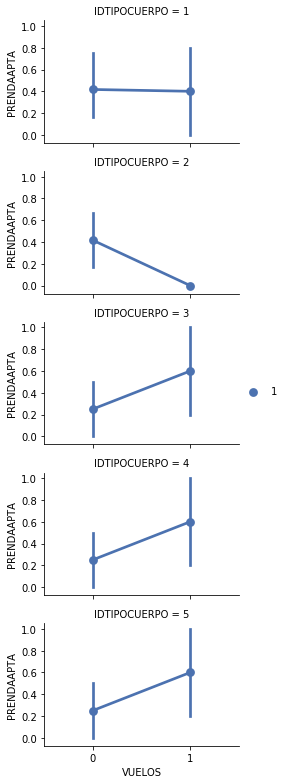

In [261]:
grid = sns.FacetGrid(datoscsv, row='IDTIPOCUERPO', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'VUELOS', 'PRENDAAPTA', 'IDTIPO', palette='deep')
grid.add_legend()

**Nota:** El tipo de cuerpo si tiene relación con los vuelos de la prenda y el campo prendaapta.

11. Análisis de capas vs prendaapta. El campo capas posee valores tipo string, por lo que deben transformarse en campo entero.

In [262]:
#cambio valores string por numéricos
for dataset in FullDataSet:
    dataset.loc[ dataset['CAPAS'] == 'SI', 'CAPAS'] = 1
    dataset.loc[ dataset['CAPAS'] == "NO", 'CAPAS'] = 0

In [263]:
#reviso que dataset tenga nuevos valores
datoscsv.head()

,SEXO,IDSEXO,TIPOCUERPO,IDTIPOCUERPO,TIPO,IDTIPO,MODELO,IDMODELO,ALTURA,FORMA,PLIEGUES,VUELOS,CAPAS,PRENDAAPTA
0,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,TABLEADA,1,3,1,1,0,0,0
1,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,LAPIZ,2,3,3,0,0,0,0
2,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,ASIMÉTRICA,3,3,1,0,1,0,0
3,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,GODETS,4,2,3,1,0,0,0
4,MUJER,1,TRIANGULO INVERTIDO,1,FALDA,1,SIRENA,5,3,3,0,1,0,0


In [264]:
#analiza capas vs prendaapta
datoscsv[['CAPAS','PRENDAAPTA']].groupby(['CAPAS'], as_index=False).mean().sort_values(by='PRENDAAPTA', ascending=False)

,CAPAS,PRENDAAPTA
1,1,0.60
0,0,0.32


**Nota:** Las capas de la prenda si tienen relación con el campo prendaapta

In [265]:
#analiza tipos de cuerpo,capas,prendaapta
datoscsv[['IDTIPOCUERPO','CAPAS','PRENDAAPTA']].groupby(['IDTIPOCUERPO','CAPAS'], as_index=False).mean().sort_values(by='IDTIPOCUERPO', ascending=False)

,IDTIPOCUERPO,CAPAS,PRENDAAPTA
8,5,0,0.400000
9,5,1,0.000000
6,4,0,0.266667
7,4,1,1.000000
4,3,0,0.266667
5,3,1,1.000000
2,2,0,0.333333
3,2,1,0.000000
0,1,0,0.333333
1,1,1,1.000000


C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Syslan\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


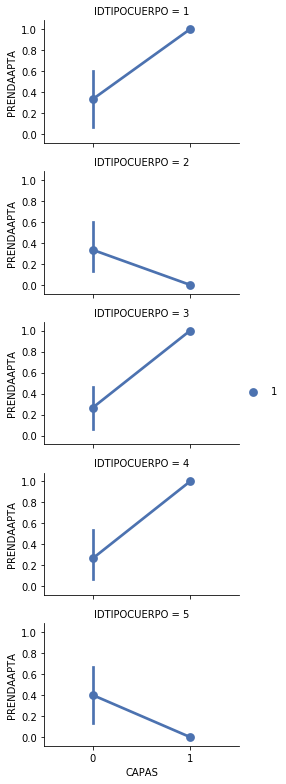

In [266]:
grid = sns.FacetGrid(datoscsv, row='IDTIPOCUERPO', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'CAPAS', 'PRENDAAPTA', 'IDTIPO', palette='deep')
grid.add_legend()

**Nota:** El tipo de cuerpo si tiene relación con las capas de la prenda y el campo prendaapta.

12. Limpieza de campos tipo string de dataset de análisis final

In [267]:
#elimino campos tipo string de dataset
datoscsv = datoscsv.drop(['SEXO', 'TIPOCUERPO', 'TIPO', 'MODELO'], axis=1)

In [268]:
#reviso tipo de datos final
datoscsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IDSEXO        85 non-null     int64 
 1   IDTIPOCUERPO  85 non-null     int64 
 2   IDTIPO        85 non-null     int64 
 3   IDMODELO      85 non-null     int64 
 4   ALTURA        85 non-null     object
 5   FORMA         85 non-null     object
 6   PLIEGUES      85 non-null     object
 7   VUELOS        85 non-null     object
 8   CAPAS         85 non-null     object
 9   PRENDAAPTA    85 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 6.8+ KB


**Definición de Variables**

In [269]:
#revisión de columnas de dataset
print(datoscsv.columns.values)

['IDSEXO' 'IDTIPOCUERPO' 'IDTIPO' 'IDMODELO' 'ALTURA' 'FORMA' 'PLIEGUES'
 'VUELOS' 'CAPAS' 'PRENDAAPTA']


In [270]:
#establecer dataset de variables a predecir
X_train = datoscsv.drop("PRENDAAPTA", axis=1)
Y_train = datoscsv["PRENDAAPTA"]
X_test = datoscsv.drop("IDTIPOCUERPO", axis=1).copy()

In [271]:
#presento filas y columnas de dataset a predecir
X_train.shape, Y_train.shape, X_test.shape

((85, 9), (85,), (85, 9))

**Análisis de Algoritmos**

Busco algoritmo que tenga mejor porcentaje de predicción

**Logistic Regression**

In [272]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

**SVC**

In [273]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

**KNeighborsClassifier**

In [274]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

**GaussianNB**

In [275]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

**Perceptron**

In [276]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

**DecisionTreeClassifier**

In [277]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

**RandomForestClassifier**

In [284]:
random_forest = RandomForestClassifier(n_estimators=75)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [285]:
#Agrupo resultados en una variable para seleccionar el modelo que usaré para la predicción final
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_decision_tree]})
#Ordeno por resultado
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
6,Decision Tree,100.00
1,KNN,85.88
2,Logistic Regression,72.94
4,Naive Bayes,70.59
0,Support Vector Machines,65.88
5,Perceptron,35.29


**Resultado:**

De los modelos analizados 2 se aplican mejor a la predicción pero elegiré para la aplicación final a <font color="green">Random Forest</font>

In [286]:
#genero archivo de resultados del modelo que será leído luego de la ejecución del botón click "Generar" de la aplicación
submission = pd.DataFrame({
        "IDMODELO": datoscsv["IDMODELO"],
        "IDTIPOCUERPO": datoscsv["IDTIPOCUERPO"],
        "PRENDAAPTA": Y_pred
    })
submission.to_csv('C:\\Users\\Syslan\\Curso AI\\DemoDayAsesorModa\\resultados\\DSFaldasResultados.csv', index=False)

print('Archivo generado')

Archivo generado
